# Amazon Reviews Scraping

In [9]:
# Import packages
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
# Header to set the requests as a browser requests
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9,bn;q=0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'
}

In [3]:
# URL of The amazon Review page
reviews_url ='https://www.amazon.in/Noise-Launched-ColorFit-Training-Analysis/product-reviews/B0CFYNMFRF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [4]:
# Define Page No
len_page = 400

# Functions

In [5]:
#Extra Data as Html object from amazon Review page
def reviewsHtml(url, len_page):
    
    # Empty List define to store all pages html data
    soups = []
    
    # Loop for gather all 2500 reviews from 25 pages via range
    for page_no in range(1, len_page + 1):
        
        # parameter set as page no to the requests body
        params = {
            'ie': 'UTF8',
            'reviewerType': 'all_reviews',
            'filterByStar': 'critical',
            'pageNumber': page_no,
        }
        
        # Request make for each page
        response = requests.get(url, headers=headers)
        
        # Save Html object by using BeautifulSoup4 and lxml parser
        soup = BeautifulSoup(response.text, 'lxml')
        
        # Add single Html page data in master soups list
        soups.append(soup)
        
    return soups

In [6]:
# Grab Reviews name, description, date, stars, title from HTML
def getReviews(html_data):

    # Create Empty list to Hold all data
    data_dicts = []
    
    # Select all Reviews BOX html using css selector
    boxes = html_data.select('div[data-hook="review"]')
    
    # Iterate all Reviews BOX 
    for box in boxes:
        
        # Select Name using css selector and cleaning text using strip()
        # If Value is empty define value with 'N/A' for all.
        try:
            name = box.select_one('[class="a-profile-name"]').text.strip()
        except Exception as e:
            name = 'N/A'

        try:
            stars = box.select_one('[data-hook="review-star-rating"]').text.strip().split(' out')[0]
        except Exception as e:
            stars = 'N/A'   

        try:
            title = box.select_one('[data-hook="review-title"]').text.strip()
        except Exception as e:
            title = 'N/A'

        try:
            date = box.select_one('[data-hook="review-date"]').text.strip().split(' on ')[-1]
        except Exception as e:
            date = 'N/A'

        try:
            description = box.select_one('[data-hook="review-body"]').text.strip()
        except Exception as e:
            description = 'N/A'

        # create Dictionary with al review data 
        data_dict = {
            'Name' : name,
            'Stars' : stars,
            'Title' : title,
            'Date' : date,
            'Description' : description
        }

        # Add Dictionary in master empty List
        data_dicts.append(data_dict)
    
    return data_dicts

# Data Process


In [7]:
# Grab all HTML
html_datas = reviewsHtml(reviews_url, len_page)

In [8]:
# Empty List to Hold all reviews data
reviews = []

In [9]:
# Iterate all Html page 
for html_data in html_datas:
    
    # Grab review data
    review = getReviews(html_data)
    
    # add review data in reviews empty list
    reviews += review

In [10]:
# Create a dataframe with reviews Data
df_reviews = pd.DataFrame(reviews)

In [11]:
df_reviews

,Name,Stars,Title,Date,Description
0,I bought This watch and it arrived at the same...,5.0,5.0 out of 5 stars\nBest watch ever...,10 April 2024,Bought this piece for a very peculiar reason. ...
1,Mustaque Ali Ansari,4.0,4.0 out of 5 stars\nValue for money and a nice...,3 February 2023,Bought this piece for a very peculiar reason. ...
2,Harsha n.,5.0,5.0 out of 5 stars\nBest in class ever...,13 May 2024,- The screen has 60 hz refresh rate that reall...
3,Bharathwaj Kuppan,5.0,5.0 out of 5 stars\nBest Smartwatch in this se...,10 June 2024,I ordered Noise Colorfit Pro Max 5 and it got ...
4,Amazon Customer,4.0,4.0 out of 5 stars\nIts a smooth and nice product,26 May 2024,The touch and UI is really smooth ..love the l...
...,...,...,...,...,...
805,Abhish.I.G,5.0,5.0 out of 5 stars\nNice and stylish product,6 June 2024,Great product and heart rate is accurate as te...
806,Anuj Surana,3.0,3.0 out of 5 stars\nBelow-par performance,22 May 2024,I had ordered this watch (ColorFit Pro 5 Max 1...
807,Sour,4.0,4.0 out of 5 stars\nNice Watch,24 May 2024,Nice watch at premium price.
808,hisham Rahman,4.0,"4.0 out of 5 stars\n""ColorFit Pro 5 Max"": It's...",12 June 2024,Product is good. Nothing much to complain.Howe...


In [136]:
# Save data
df_reviews.to_csv('reviews.csv', index=False)

In [10]:
df_reviews=pd.read_csv(r"C:\Users\Rajesh Gonnade\Downloads\reviews.csv")
df_reviews

,Name,Stars,Title,Date,Description
0,I bought This watch and it arrived at the same...,5.0,5.0 out of 5 stars\nBest watch ever...,10 April 2024,Bought this piece for a very peculiar reason. ...
1,Mustaque Ali Ansari,4.0,4.0 out of 5 stars\nValue for money and a nice...,3 February 2023,Bought this piece for a very peculiar reason. ...
2,Harsha n.,5.0,5.0 out of 5 stars\nBest in class ever...,13 May 2024,- The screen has 60 hz refresh rate that reall...
3,Amazon Customer,4.0,4.0 out of 5 stars\nIts a smooth and nice product,26 May 2024,The touch and UI is really smooth ..love the l...
4,Harish Pandi,5.0,5.0 out of 5 stars\nLoved the product,2 June 2024,The product is so good and classy and also it ...
...,...,...,...,...,...
2495,Shroddha Banerjee,5.0,5.0 out of 5 stars\nAmazing Product,22 May 2024,Great product. Worth Purchase. Great features....
2496,Anuj Surana,3.0,3.0 out of 5 stars\nBelow-par performance,22 May 2024,I had ordered this watch (ColorFit Pro 5 Max 1...
2497,Surabhi Nair,4.0,4.0 out of 5 stars\nGood looking!!!!,23 May 2024,I like how it has a premium finish and looks q...
2498,Rajagopal,4.0,4.0 out of 5 stars\nA royal watch at this pric...,23 May 2024,Nice watch with a royal touch. Functionalities...


*Text Preprocessing*

In [11]:
df_reviews.describe()

,Stars
count,2500.000000
mean,4.300000
std,0.640441
min,3.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


In [12]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2500 non-null   object 
 1   Stars        2500 non-null   float64
 2   Title        2500 non-null   object 
 3   Date         2500 non-null   object 
 4   Description  2500 non-null   object 
dtypes: float64(1), object(4)
memory usage: 97.8+ KB


In [13]:
df_reviews.isna().sum()

Name           0
Stars          0
Title          0
Date           0
Description    0
dtype: int64

In [14]:
#df_reviews.duplicated().sum()

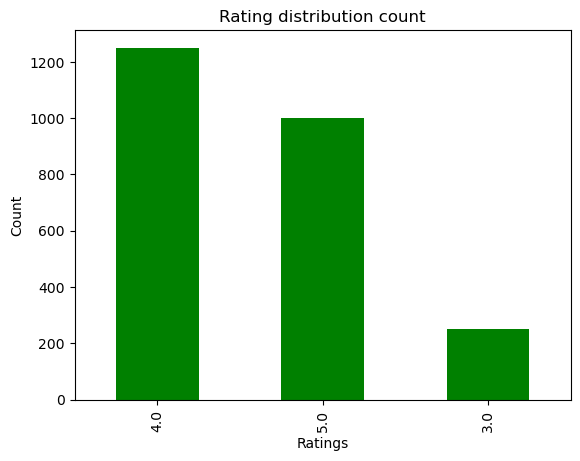

In [15]:
# Bar plot to visualize the total counts of each rating
import matplotlib.pyplot as plt
df_reviews['Stars'].value_counts().plot.bar(color='green')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

# # Finding the percentage distribution of each rating

In [16]:
percentage_distribution=round(df_reviews['Stars'].value_counts()/df_reviews.shape[0]*100,2)
percentage_distribution

4.0    50.0
5.0    40.0
3.0    10.0
Name: Stars, dtype: float64

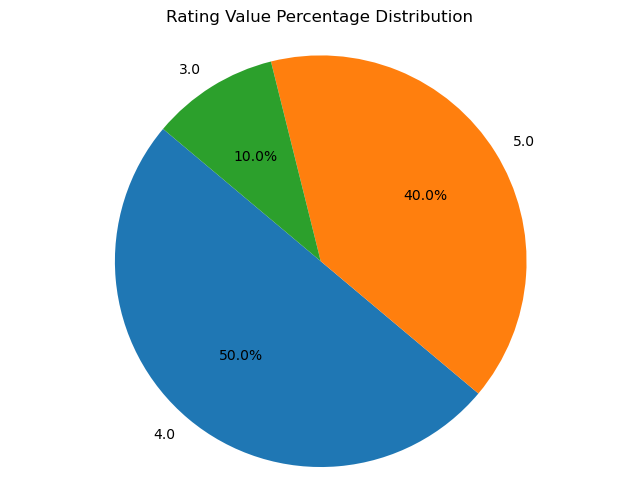

In [17]:
# Draw a pie chart
plt.figure(figsize=(8, 6))
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Rating Value Percentage Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [18]:
df_reviews

,Name,Stars,Title,Date,Description
0,I bought This watch and it arrived at the same...,5.0,5.0 out of 5 stars\nBest watch ever...,10 April 2024,Bought this piece for a very peculiar reason. ...
1,Mustaque Ali Ansari,4.0,4.0 out of 5 stars\nValue for money and a nice...,3 February 2023,Bought this piece for a very peculiar reason. ...
2,Harsha n.,5.0,5.0 out of 5 stars\nBest in class ever...,13 May 2024,- The screen has 60 hz refresh rate that reall...
3,Amazon Customer,4.0,4.0 out of 5 stars\nIts a smooth and nice product,26 May 2024,The touch and UI is really smooth ..love the l...
4,Harish Pandi,5.0,5.0 out of 5 stars\nLoved the product,2 June 2024,The product is so good and classy and also it ...
...,...,...,...,...,...
2495,Shroddha Banerjee,5.0,5.0 out of 5 stars\nAmazing Product,22 May 2024,Great product. Worth Purchase. Great features....
2496,Anuj Surana,3.0,3.0 out of 5 stars\nBelow-par performance,22 May 2024,I had ordered this watch (ColorFit Pro 5 Max 1...
2497,Surabhi Nair,4.0,4.0 out of 5 stars\nGood looking!!!!,23 May 2024,I like how it has a premium finish and looks q...
2498,Rajagopal,4.0,4.0 out of 5 stars\nA royal watch at this pric...,23 May 2024,Nice watch with a royal touch. Functionalities...


# sentiment analysis

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from nltk.classify import NaiveBayesClassifier
from cleantext import clean

In [20]:
review_data=pd.read_csv(r"C:\Users\Rajesh Gonnade\Downloads\reviews.csv")
review_data

,Name,Stars,Title,Date,Description
0,I bought This watch and it arrived at the same...,5.0,5.0 out of 5 stars\nBest watch ever...,10 April 2024,Bought this piece for a very peculiar reason. ...
1,Mustaque Ali Ansari,4.0,4.0 out of 5 stars\nValue for money and a nice...,3 February 2023,Bought this piece for a very peculiar reason. ...
2,Harsha n.,5.0,5.0 out of 5 stars\nBest in class ever...,13 May 2024,- The screen has 60 hz refresh rate that reall...
3,Amazon Customer,4.0,4.0 out of 5 stars\nIts a smooth and nice product,26 May 2024,The touch and UI is really smooth ..love the l...
4,Harish Pandi,5.0,5.0 out of 5 stars\nLoved the product,2 June 2024,The product is so good and classy and also it ...
...,...,...,...,...,...
2495,Shroddha Banerjee,5.0,5.0 out of 5 stars\nAmazing Product,22 May 2024,Great product. Worth Purchase. Great features....
2496,Anuj Surana,3.0,3.0 out of 5 stars\nBelow-par performance,22 May 2024,I had ordered this watch (ColorFit Pro 5 Max 1...
2497,Surabhi Nair,4.0,4.0 out of 5 stars\nGood looking!!!!,23 May 2024,I like how it has a premium finish and looks q...
2498,Rajagopal,4.0,4.0 out of 5 stars\nA royal watch at this pric...,23 May 2024,Nice watch with a royal touch. Functionalities...


In [21]:
df=pd.DataFrame(review_data['Description'])
df

,Description
0,Bought this piece for a very peculiar reason. ...
1,Bought this piece for a very peculiar reason. ...
2,- The screen has 60 hz refresh rate that reall...
3,The touch and UI is really smooth ..love the l...
4,The product is so good and classy and also it ...
...,...
2495,Great product. Worth Purchase. Great features....
2496,I had ordered this watch (ColorFit Pro 5 Max 1...
2497,I like how it has a premium finish and looks q...
2498,Nice watch with a royal touch. Functionalities...


# Removing emojies 

In [22]:
#!pip install emoji

In [23]:
import emoji

# Replace emojis with an empty string
df['Description'] = df['Description'].apply(lambda s: emoji.replace_emoji(str(s), '') if isinstance(s, str) else '')
df

,Description
0,Bought this piece for a very peculiar reason. ...
1,Bought this piece for a very peculiar reason. ...
2,- The screen has 60 hz refresh rate that reall...
3,The touch and UI is really smooth ..love the l...
4,The product is so good and classy and also it ...
...,...
2495,Great product. Worth Purchase. Great features....
2496,I had ordered this watch (ColorFit Pro 5 Max 1...
2497,I like how it has a premium finish and looks q...
2498,Nice watch with a royal touch. Functionalities...


In [24]:
# Convert all strings in the 'Description' column to lowercase
df['Description'] = df['Description'].str.lower()
df

,Description
0,bought this piece for a very peculiar reason. ...
1,bought this piece for a very peculiar reason. ...
2,- the screen has 60 hz refresh rate that reall...
3,the touch and ui is really smooth ..love the l...
4,the product is so good and classy and also it ...
...,...
2495,great product. worth purchase. great features....
2496,i had ordered this watch (colorfit pro 5 max 1...
2497,i like how it has a premium finish and looks q...
2498,nice watch with a royal touch. functionalities...


# Using NLTK's Sentiment Intensity Analyzer

In [25]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [26]:
sentiments_using_SIA = df['Description'].apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Description
pos,2250
neg,250


In [27]:
# Using TextBlob sentiment analyzer

In [28]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity > 0 else 'neg'

In [29]:
sentiments_using_textblob =df['Description'].apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Description
pos,2250
neg,250


In [30]:
df['sentiment']=sentiments_using_textblob
df

,Description,sentiment
0,bought this piece for a very peculiar reason. ...,pos
1,bought this piece for a very peculiar reason. ...,pos
2,- the screen has 60 hz refresh rate that reall...,pos
3,the touch and ui is really smooth ..love the l...,pos
4,the product is so good and classy and also it ...,pos
...,...,...
2495,great product. worth purchase. great features....,pos
2496,i had ordered this watch (colorfit pro 5 max 1...,pos
2497,i like how it has a premium finish and looks q...,pos
2498,nice watch with a royal touch. functionalities...,pos


# Removing tweets with empty text

In [31]:
df = df[df['Description']!='']
df

,Description,sentiment
0,bought this piece for a very peculiar reason. ...,pos
1,bought this piece for a very peculiar reason. ...,pos
2,- the screen has 60 hz refresh rate that reall...,pos
3,the touch and ui is really smooth ..love the l...,pos
4,the product is so good and classy and also it ...,pos
...,...,...
2495,great product. worth purchase. great features....,pos
2496,i had ordered this watch (colorfit pro 5 max 1...,pos
2497,i like how it has a premium finish and looks q...,pos
2498,nice watch with a royal touch. functionalities...,pos


In [32]:
# Dropping duplicate rows

In [33]:
df.drop_duplicates(subset=['Description'], keep=False)
df

,Description,sentiment
0,bought this piece for a very peculiar reason. ...,pos
1,bought this piece for a very peculiar reason. ...,pos
2,- the screen has 60 hz refresh rate that reall...,pos
3,the touch and ui is really smooth ..love the l...,pos
4,the product is so good and classy and also it ...,pos
...,...,...
2495,great product. worth purchase. great features....,pos
2496,i had ordered this watch (colorfit pro 5 max 1...,pos
2497,i like how it has a premium finish and looks q...,pos
2498,nice watch with a royal touch. functionalities...,pos


# Removing Punctuations, Numbers and Special characters

In [34]:
df['Description'] = df['Description'].str.replace("[^a-zA-Z# ]", "")
df

C:\Users\Rajesh Gonnade\AppData\Local\Temp\ipykernel_14132\1411579327.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Description'] = df['Description'].str.replace("[^a-zA-Z# ]", "")


,Description,sentiment
0,bought this piece for a very peculiar reason n...,pos
1,bought this piece for a very peculiar reason n...,pos
2,the screen has hz refresh rate that really m...,pos
3,the touch and ui is really smooth love the loo...,pos
4,the product is so good and classy and also it ...,pos
...,...,...
2495,great product worth purchase great features us...,pos
2496,i had ordered this watch colorfit pro max am...,pos
2497,i like how it has a premium finish and looks q...,pos
2498,nice watch with a royal touch functionalities ...,pos


In [35]:
# Removing Stop words

In [36]:
stopwords_set = set(stopwords.words('english'))
cleaned_reviews = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Description.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
df['Description'] = cleaned_reviews
df

,Description,sentiment
0,bought piece peculiar reason needed watch remi...,pos
1,bought piece peculiar reason needed watch remi...,pos
2,screen hz refresh rate really makes responsive...,pos
3,touch ui really smooth love look features watc...,pos
4,product good classy also gives rich vibe also ...,pos
...,...,...
2495,great product worth purchase great features us...,pos
2496,ordered watch colorfit pro max amoled display ...,pos
2497,like premium finish looks quite good wrist goo...,pos
2498,nice watch royal touch functionalities amazing...,pos


[Text(0.5, 1.0, 'Distribution of reviews')]

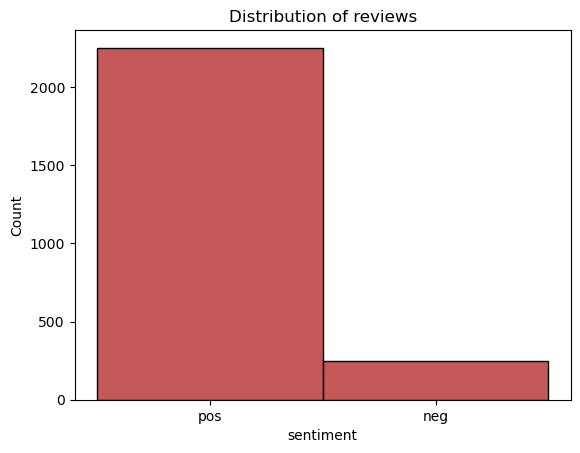

In [37]:
import seaborn as sns
sns.histplot(df['sentiment'],color='firebrick').set(title='Distribution of reviews')

# Tokenize
'''Tokenization is the process of dividing a continuous sequence of text (such as a sentence or paragraph) into smaller units called tokens.'''

In [38]:
tokenized_reviws = df['Description'].apply(lambda x: x.split())
tokenized_reviws

0       [bought, piece, peculiar, reason, needed, watc...
1       [bought, piece, peculiar, reason, needed, watc...
2       [screen, hz, refresh, rate, really, makes, res...
3       [touch, ui, really, smooth, love, look, featur...
4       [product, good, classy, also, gives, rich, vib...
                              ...                        
2495    [great, product, worth, purchase, great, featu...
2496    [ordered, watch, colorfit, pro, max, amoled, d...
2497    [like, premium, finish, looks, quite, good, wr...
2498    [nice, watch, royal, touch, functionalities, a...
2499    [neat, display, looks, upmarket, vital, readin...
Name: Description, Length: 2500, dtype: object

In [39]:
# Lemmatization
'''Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down 
to its root meaning (called a lemma or dictionary form).'''

'Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down \nto its root meaning (called a lemma or dictionary form).'

In [40]:
word_lemmatizer = WordNetLemmatizer()

In [41]:
tokenized_reviws = tokenized_reviws.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_reviws

0       [bought, piece, peculiar, reason, needed, watc...
1       [bought, piece, peculiar, reason, needed, watc...
2       [screen, hz, refresh, rate, really, make, resp...
3       [touch, ui, really, smooth, love, look, featur...
4       [product, good, classy, also, give, rich, vibe...
                              ...                        
2495    [great, product, worth, purchase, great, featu...
2496    [ordered, watch, colorfit, pro, max, amoled, d...
2497    [like, premium, finish, look, quite, good, wri...
2498    [nice, watch, royal, touch, functionality, ama...
2499    [neat, display, look, upmarket, vital, reading...
Name: Description, Length: 2500, dtype: object

# Joining all tokens into sentences

In [42]:
for i, tokens in enumerate(tokenized_reviws):
    tokenized_reviws[i] = ' '.join(tokens)

df['Description'] = tokenized_reviws
df

,Description,sentiment
0,bought piece peculiar reason needed watch remi...,pos
1,bought piece peculiar reason needed watch remi...,pos
2,screen hz refresh rate really make responsive ...,pos
3,touch ui really smooth love look feature watch...,pos
4,product good classy also give rich vibe also g...,pos
...,...,...
2495,great product worth purchase great feature use...,pos
2496,ordered watch colorfit pro max amoled display ...,pos
2497,like premium finish look quite good wrist good...,pos
2498,nice watch royal touch functionality amazing e...,pos


In [43]:
# WordCloud

In [44]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [45]:
# Most common words in positive tweets

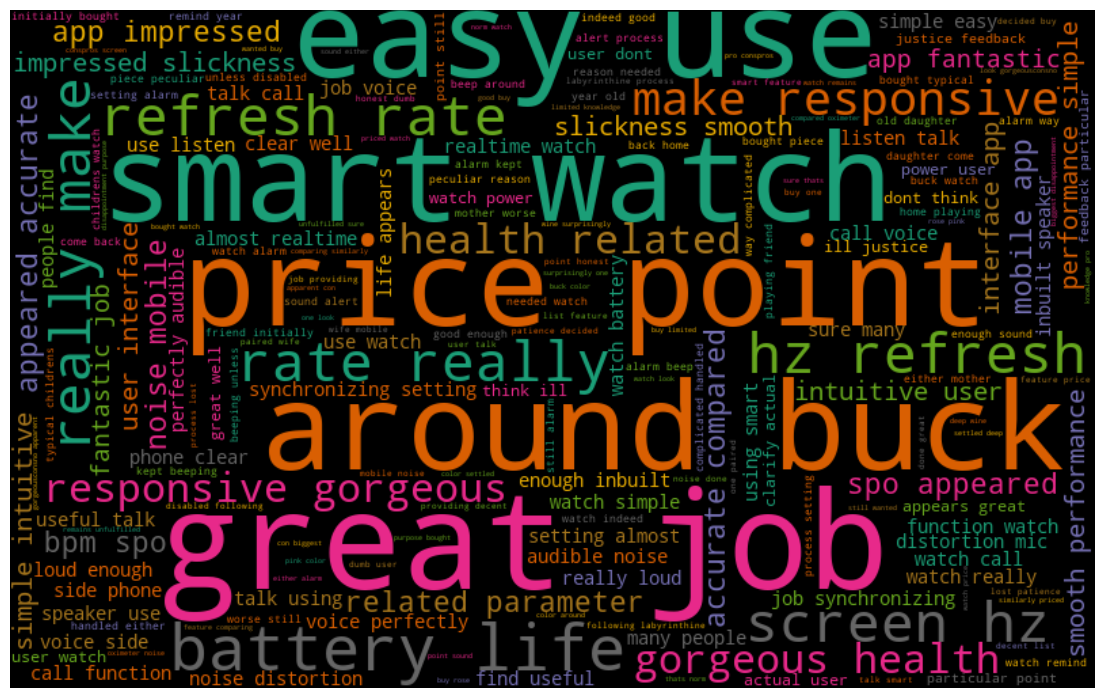

In [46]:
all_words = ' '.join([text for text in df['Description'][df.sentiment == 'pos']])
generate_wordcloud(all_words)

In [47]:
# Most common words in negative tweets

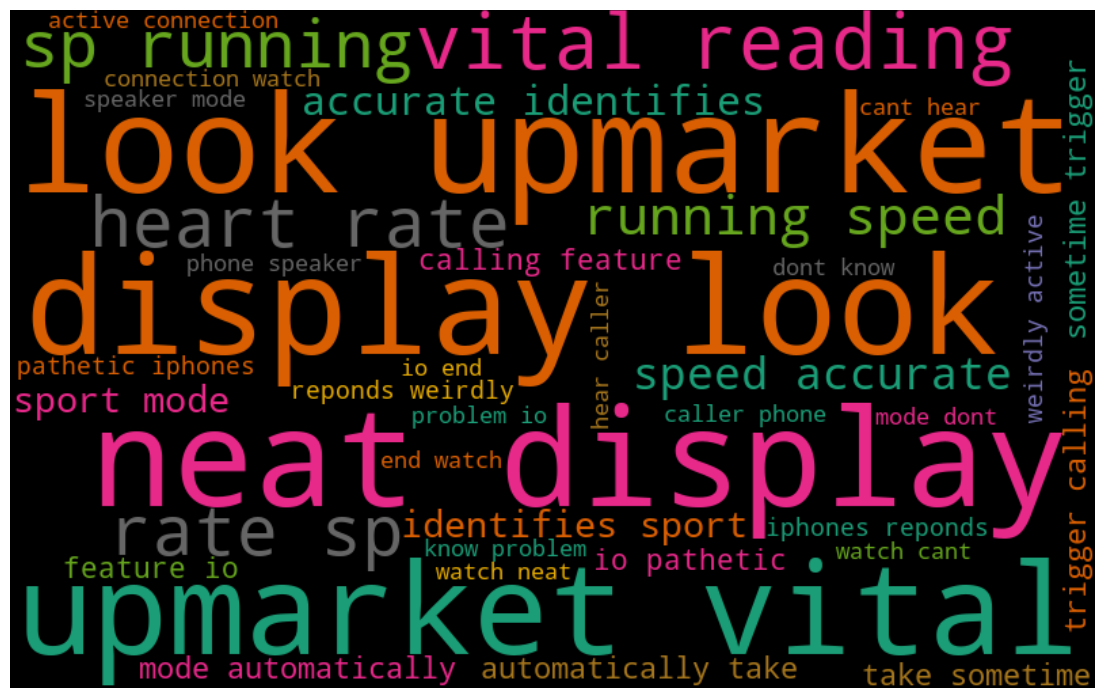

In [48]:
all_words = ' '.join([text for text in df['Description'][df['sentiment'] == 'neg']])
generate_wordcloud(all_words)

simple way to extract key phrases, by using TextBlob (ConllExtractor)

# Feature Extraction
We need to convert textual representation in the form on numeric features. We have two popular techniques to perform feature extraction:

Bag of words (Simple vectorization)
TF-IDF (Term Frequency - Inverse Document Frequency)
We will use extracted features from both one by one to perform sentiment analysis and will compare the result at last.

In [49]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(df['Description'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df['Description'])

# Model Building: Sentiment Analysis

# Map target variables to {0, 1}

In [90]:
y= df['sentiment'].apply(lambda x: 0 if x=='neg' else 1)

# Model Building using TF-IDF 

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [52]:
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_word_feature,y,test_size=0.3,random_state=15)

In [53]:
# Check class distribution
print(pd.Series(ytrain).value_counts())
print(pd.Series(ytest).value_counts())


1    1569
0     181
Name: sentiment, dtype: int64
1    681
0     69
Name: sentiment, dtype: int64


In [54]:
#Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(xtrain,ytrain)

# predictions over test set
predictions =model_lr.predict(xtest)
print("Training Accuracy:",model_lr.score(xtrain,ytrain))
print("Testing Accuracy:",model_lr.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [55]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 69   0]
 [  0 681]]


In [56]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       681

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [57]:
#Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)

# predictions over test set
predictions =model_dt.predict(xtest)
print("Training Accuracy:",model_dt.score(xtrain,ytrain))
print("Testing Accuracy:",model_dt.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [58]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 69   0]
 [  0 681]]


In [59]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       681

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [60]:
# Random Forest
model_rf=RandomForestClassifier()
model_rf.fit(xtrain,ytrain)

# predictions over test set
predictions =model_rf.predict(xtest)
print("Training Accuracy:",model_rf.score(xtrain,ytrain))
print("Testing Accuracy:",model_rf.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [61]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 69   0]
 [  0 681]]


In [62]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       681

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Set up the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

In [64]:
# Naive_bayes

In [65]:
naive_classifier = GaussianNB()
naive_classifier.fit(xtrain.toarray(), ytrain)

# predictions over test set
predictions = naive_classifier.predict(xtest.toarray())
print("Training Accuracy:",naive_classifier.score(xtrain.toarray(),ytrain))
print("Testing Accuracy:",naive_classifier.score(xtest.toarray(),ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [66]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 69   0]
 [  0 681]]


In [67]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       681

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [68]:
#GB
model_gb=GradientBoostingClassifier()
model_gb.fit(xtrain,ytrain)
predictions =model_gb.predict(xtest)
print("Training Accuracy:",model_gb.score(xtrain,ytrain))
print("Testing Accuracy:",model_gb.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [69]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 69   0]
 [  0 681]]


In [70]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       681

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [71]:
params = {
    'n_estimators' : [90,110,150],
    'learning_rate' : [0.5,0.6,0.7,0.9,1],
    'max_depth' : [3,5,7,11]
}
grid = GridSearchCV(GradientBoostingClassifier(), params, verbose=1)

grid.fit(xtrain,ytrain)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [72]:
grid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 90}

In [73]:
model_gb=GradientBoostingClassifier(learning_rate=0.5, max_depth=3, n_estimators=90)
model_gb.fit(xtrain,ytrain)
predictions =model_gb.predict(xtest)
print("Training Accuracy:",model_gb.score(xtrain,ytrain))
print("Testing Accuracy:",model_gb.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [74]:
#XGBOOST
model_xgb=XGBClassifier()
model_xgb.fit(xtrain,ytrain)
predictions =model_xgb.predict(xtest)
print("Training Accuracy:",model_xgb.score(xtrain,ytrain))
print("Testing Accuracy:",model_xgb.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [75]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 69   0]
 [  0 681]]


In [76]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       681

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [77]:
#svc
model_svc=SVC()
model_svc.fit(xtrain,ytrain)
predictions =model_xgb.predict(xtest)
print("Training Accuracy:",model_svc.score(xtrain,ytrain))
print("Testing Accuracy:",model_svc.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [78]:
cm=confusion_matrix(ytest,predictions)
print(cm)

[[ 69   0]
 [  0 681]]


In [79]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       681

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [80]:
from sklearn.model_selection import GridSearchCV
param = {
    'kernel' : ['linear','rbf','poly']
}
grid = GridSearchCV(SVC(), param_grid= param, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [81]:
grid.best_params_

{'kernel': 'linear'}

In [82]:
model_svc=SVC(kernel='linear')
model_svc.fit(xtrain,ytrain)
predictions =model_xgb.predict(xtest)
print("Training Accuracy:",model_svc.score(xtrain,ytrain))
print("Testing Accuracy:",model_svc.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [83]:
''' all models giving 100% accuracy.'''

' all models giving 100% accuracy.'

In [84]:
models = {"Logistic Regression" : LogisticRegression(),"Decision Tree": DecisionTreeClassifier(),"Random Forest": RandomForestClassifier(),"naive classifier": GaussianNB(),"Gradient Boosting": GradientBoostingClassifier(),"Support Vector Classifier": SVC(),"Xtreme Gradient Boosting":XGBClassifier()}
results = []
for name, model in models.items():
    model.fit(xtrain.toarray(), ytrain) 
    predictions = model.predict(xtest.toarray())
    Train_Accuracy = model.score(xtrain.toarray(), ytrain)
    Test_Accuracy = model.score(xtest.toarray() ,ytest)
    cm=confusion_matrix(ytest,predictions)
    results.append({"Regressor MODEL": name, "Train Acc": Train_Accuracy, "Test Acc":Test_Accuracy,"Confusion Matrix": cm})
models_df = pd.DataFrame(results)
models_df.sort_values(by=["Train Acc","Test Acc"], ascending=False)

,Regressor MODEL,Train Acc,Test Acc,Confusion Matrix
0,Logistic Regression,1.0,1.0,"[[69, 0], [0, 681]]"
1,Decision Tree,1.0,1.0,"[[69, 0], [0, 681]]"
2,Random Forest,1.0,1.0,"[[69, 0], [0, 681]]"
3,naive classifier,1.0,1.0,"[[69, 0], [0, 681]]"
4,Gradient Boosting,1.0,1.0,"[[69, 0], [0, 681]]"
5,Support Vector Classifier,1.0,1.0,"[[69, 0], [0, 681]]"
6,Xtreme Gradient Boosting,1.0,1.0,"[[69, 0], [0, 681]]"


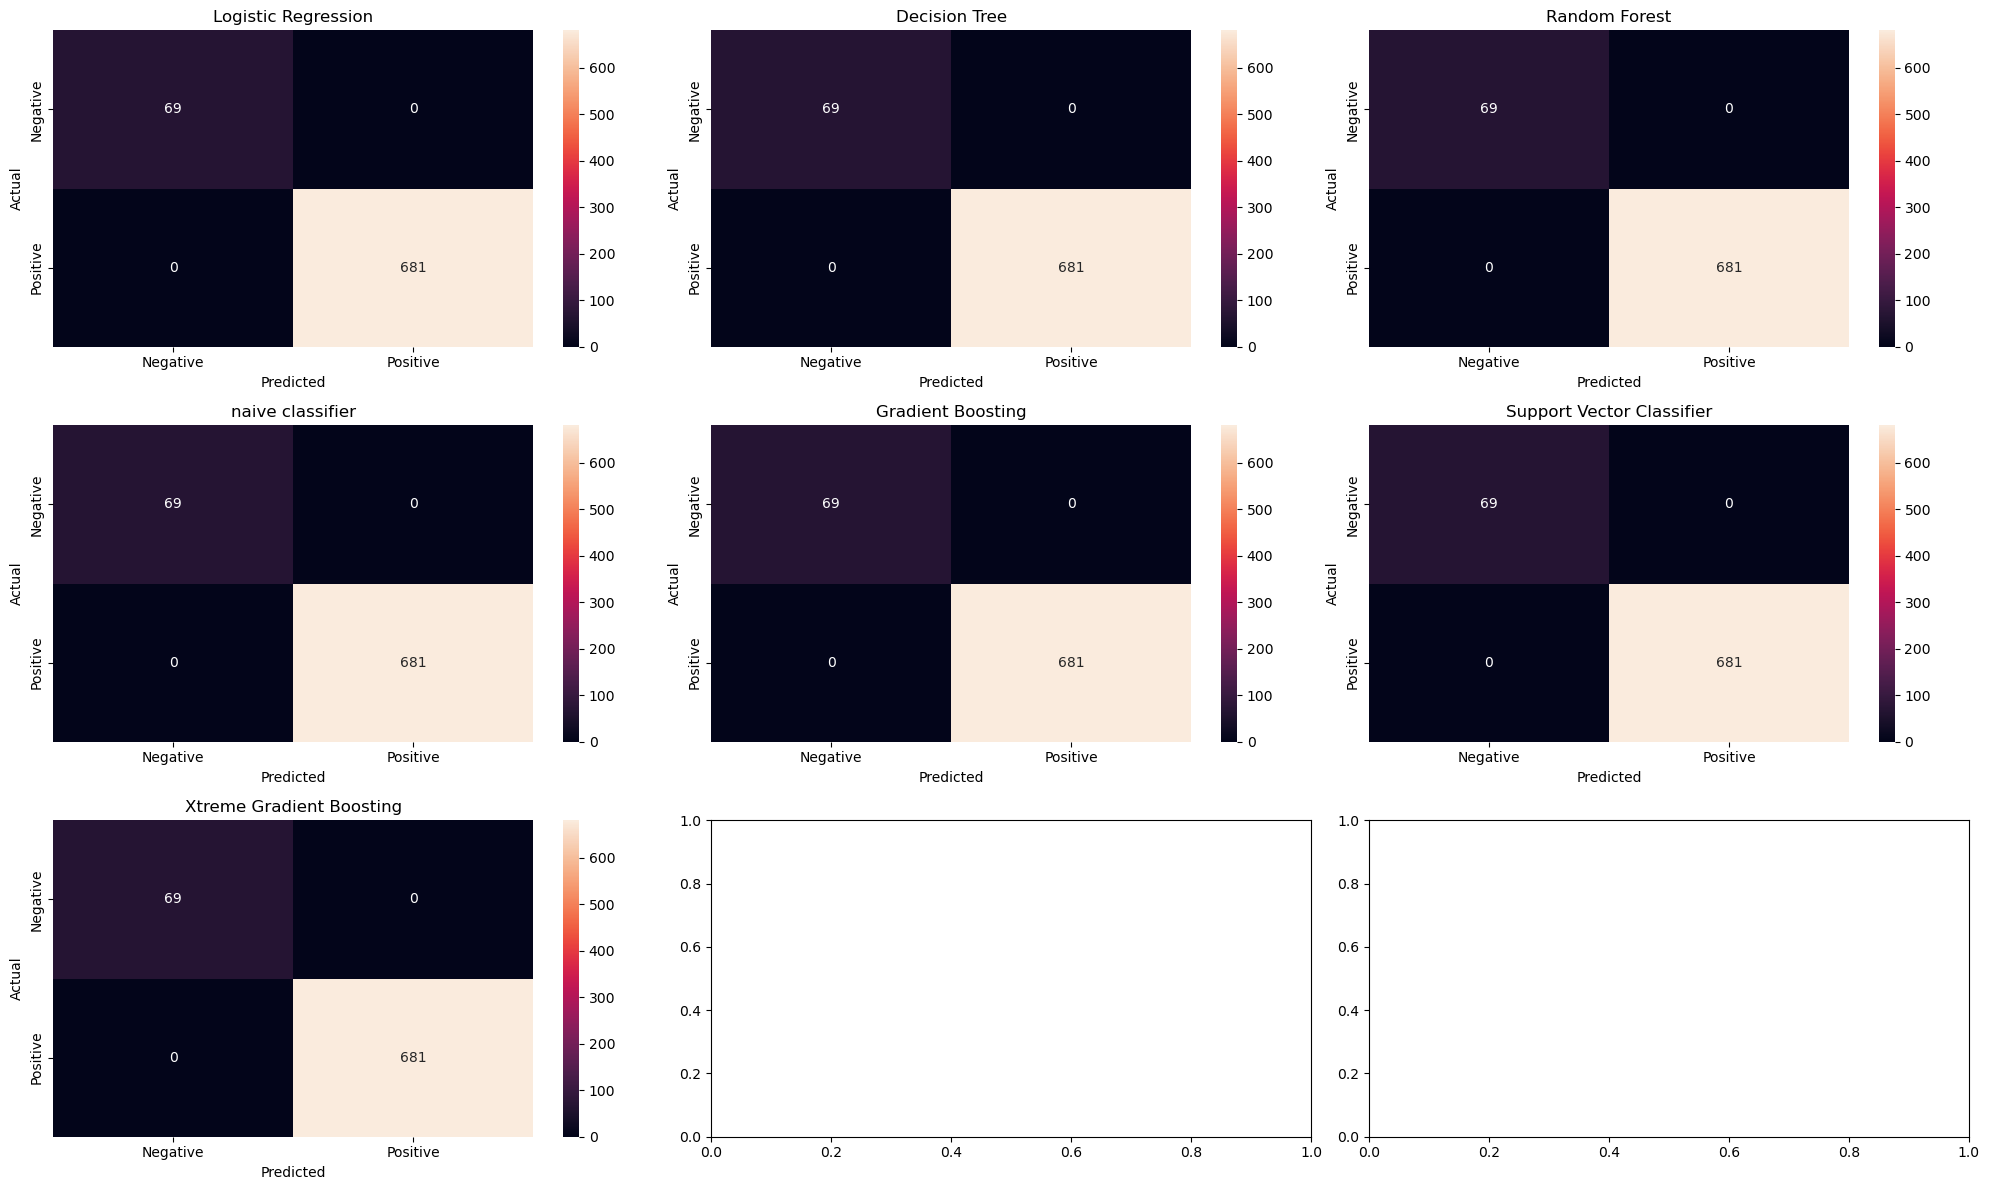

In [85]:
# Function to plot confusion matrix
def plot_confusion_matrix(ax, cm, labels, title):
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title(title)

# Create subplots for confusion matrices
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# Plot each confusion matrix
for i, result in enumerate(results):
    row = i // 3
    col = i % 3
    model_name = result["Regressor MODEL"]
    cm = result["Confusion Matrix"]
    plot_confusion_matrix(axes[row, col], cm, labels=['Negative', 'Positive'], title=model_name)

plt.tight_layout()
plt.show()


# Deployment

In [86]:
#PIPELINE

In [87]:
import pickle

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline, make_pipeline
import joblib

x = df['Description']

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2,random_state=1)

# Example pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', XGBClassifier())
])

# Train the model with your data
model.fit(xtrain, ytrain)

# Save the model
pickle.dump(model, open('model.pkl','wb'))
print("Model saved successfully")

model1=pickle.load(open('model.pkl','rb'))
print("Model loaded successfully")


Model saved successfully
Model loaded successfully
